<a href="https://colab.research.google.com/github/Sarinda251/CAP_5610/blob/master/movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install surprise

In [4]:
import pandas as pd
from surprise import SVD, KNNBasic
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
import statistics
import matplotlib.pyplot as plt
import numpy as np

In [5]:
reader = Reader(line_format="user item rating timestamp", sep=',', skip_lines = 1)
data = Dataset.load_from_file("ratings_small.csv", reader=reader)

PMF

In [ ]:
#SVD without bias is equivalent to PMF
algo = SVD(biased=False)

pmf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5)
print(pmf)

{'test_rmse': array([1.00584087, 1.00524071, 1.01383304, 1.01347319, 1.00600293]), 'test_mae': array([0.777435  , 0.77696923, 0.78244879, 0.78060789, 0.77820841]), 'fit_time': (4.969432353973389, 4.9264817237854, 4.917420387268066, 4.885930299758911, 4.8976428508758545), 'test_time': (0.19714951515197754, 0.12510204315185547, 0.12220048904418945, 0.13031244277954102, 0.19902276992797852)}


user-based collaborative filtering

In [ ]:
#user based
algo = KNNBasic(sim_options={'user_based': True})
ubased = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5)

In [ ]:
print(ubased)

{'test_rmse': array([0.96481725, 0.96895607, 0.96118272, 0.96968215, 0.97080462]), 'test_mae': array([0.7378558 , 0.74578082, 0.73977413, 0.74400683, 0.7463937 ]), 'fit_time': (0.13596796989440918, 0.15313959121704102, 0.16738557815551758, 0.16170787811279297, 0.14517760276794434), 'test_time': (1.727545976638794, 1.7402124404907227, 1.659088134765625, 1.759129285812378, 1.730762243270874)}


item-based collaborative filtering

In [ ]:
#item based
algo = KNNBasic(sim_options={'user_based': False})
ibased = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5)

In [ ]:
print(ibased)

{'test_rmse': array([0.93919685, 0.9284768 , 0.93400013, 0.93439516, 0.93749131]), 'test_mae': array([0.7227207 , 0.71406091, 0.72225191, 0.72223835, 0.72440605]), 'fit_time': (3.849188804626465, 3.8490941524505615, 3.9588027000427246, 4.02915096282959, 4.054906129837036), 'test_time': (6.919955492019653, 7.19512939453125, 7.164139270782471, 7.167704105377197, 6.96502685546875)}


In [ ]:
print("Average MAE of PMF")
print(statistics.mean(pmf['test_mae']))
print("Average RMSE of PMF")
print(statistics.mean(pmf['test_rmse']))
print("Average MAE of User-Based Collaborative Filtering")
print(statistics.mean(ubased['test_mae']))
print("Average RMSE of User-Based Collaborative Filtering")
print(statistics.mean(ubased['test_rmse']))
print("Average MAE of Item-Based Collaborative Filtering")
print(statistics.mean(ibased['test_mae']))
print("Average RMSE of Item-Based Collaborative Filtering")
print(statistics.mean(ibased['test_rmse']))

Average MAE of PMF
0.7791338629157123
Average RMSE of PMF
1.008878146764582
Average MAE of User-Based Collaborative Filtering
0.7427622540759493
Average RMSE of User-Based Collaborative Filtering
0.9670885615842494
Average MAE of Item-Based Collaborative Filtering
0.7211355807326462
Average RMSE of Item-Based Collaborative Filtering
0.9347120520563776


User-Based with varying metrics

In [ ]:
algo1 = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
algo2 = KNNBasic(sim_options={'name': 'msd', 'user_based': True})
algo3 = KNNBasic(sim_options={'name': 'pearson', 'user_based': True})
ubased1 = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5)
ubased2 = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5)
ubased3 = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5)

MAE

In [ ]:
print("cosine")
print(statistics.mean(ubased1['test_mae']))
print("msd")
print(statistics.mean(ubased2['test_mae']))
print("pearson")
print(statistics.mean(ubased3['test_mae']))

cosine
0.7678226759624266
msd
0.7439231849532458
pearson
0.7721925848214781


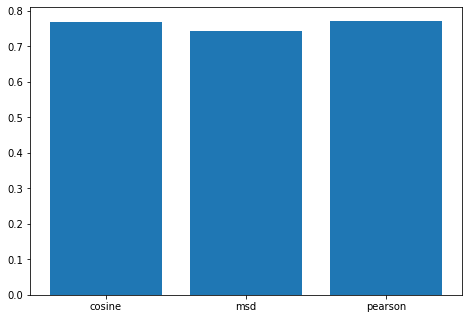

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
metrics = ['cosine', 'msd', 'pearson']
vals = [statistics.mean(ubased1['test_mae']),statistics.mean(ubased2['test_mae']),statistics.mean(ubased3['test_mae'])]
ax.bar(metrics,vals)
plt.show()

RMSE

In [ ]:
print("cosine")
print(statistics.mean(ubased1['test_rmse']))
print("msd")
print(statistics.mean(ubased2['test_rmse']))
print("pearson")
print(statistics.mean(ubased3['test_rmse']))

cosine
0.9942531730251778
msd
0.9678580638348994
pearson
0.9970378043991472


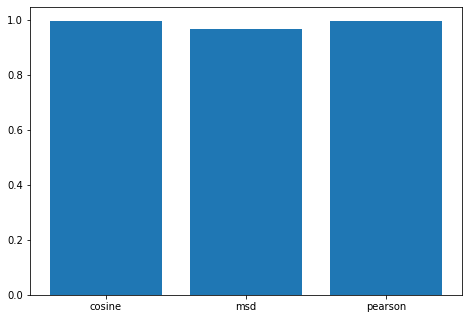

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
metrics = ['cosine', 'msd', 'pearson']
vals = [statistics.mean(ubased1['test_rmse']),statistics.mean(ubased2['test_rmse']),statistics.mean(ubased3['test_rmse'])]
ax.bar(metrics,vals)
plt.show()

Item-Based with varying metrics

In [ ]:
algo1 = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})
algo2 = KNNBasic(sim_options={'name': 'msd', 'user_based': False})
algo3 = KNNBasic(sim_options={'name': 'pearson', 'user_based': False})
ibased1 = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5)
ibased2 = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5)
ibased3 = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5)

MAE

In [ ]:
print("cosine")
print(statistics.mean(ibased1['test_mae']))
print("msd")
print(statistics.mean(ibased2['test_mae']))
print("pearson")
print(statistics.mean(ibased3['test_mae']))

cosine
0.7742615715897431
msd
0.7210903719922351
pearson
0.7686599755237605


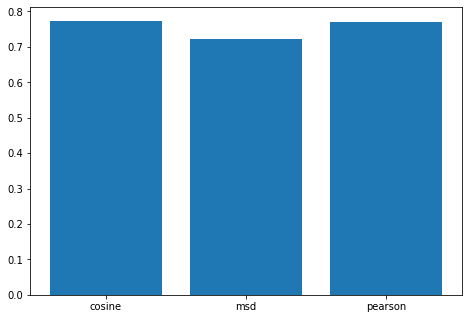

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
metrics = ['cosine', 'msd', 'pearson']
vals = [statistics.mean(ibased1['test_mae']),statistics.mean(ibased2['test_mae']),statistics.mean(ibased3['test_mae'])]
ax.bar(metrics,vals)
plt.show()

RSME

In [ ]:
print("cosine")
print(statistics.mean(ibased1['test_rmse']))
print("msd")
print(statistics.mean(ibased2['test_rmse']))
print("pearson")
print(statistics.mean(ibased3['test_rmse']))

cosine
0.9951389290765813
msd
0.9350164358182761
pearson
0.9902687681173551


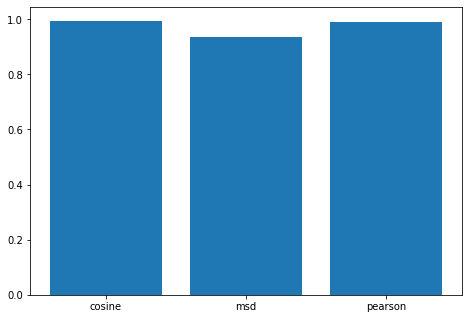

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
metrics = ['cosine', 'msd', 'pearson']
vals = [statistics.mean(ibased1['test_rmse']),statistics.mean(ibased2['test_rmse']),statistics.mean(ibased3['test_rmse'])]
ax.bar(metrics,vals)
plt.show()

varying k values for user-based

In [ ]:
#user based
values1 = []
for i in range(5, 100, 5):
  algo = KNNBasic(k = i, sim_options={'user_based': True})
  acc = cross_validate(algo, data, measures={'RMSE'}, cv=5)
  values1.append(statistics.mean(acc['test_rmse']))

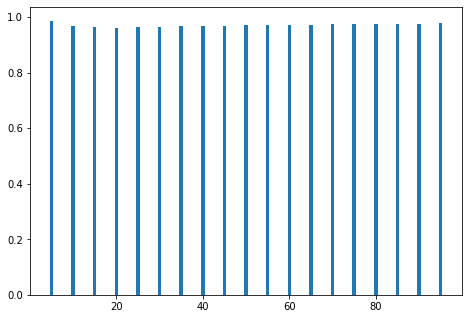

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xval = np.linspace(5,95,19)
ax.bar(xval,values1)
plt.show()

In [ ]:
#user based
values3 = []
for i in range(6, 15):
  algo = KNNBasic(k = i, sim_options={'user_based': True})
  acc = cross_validate(algo, data, measures={'RMSE'}, cv=5)
  values3.append(statistics.mean(acc['test_rmse']))

In [22]:
print(np.linspace(6,14,9))
print(values3)

[ 6.  7.  8.  9. 10. 11. 12. 13. 14.]
[0.9792011920244109, 0.9740155139973923, 0.9694368954564574, 0.9660874408431457, 0.9650711988103944, 0.9628328345346246, 0.9628411824946304, 0.9635409640826483, 0.9627296812663668]


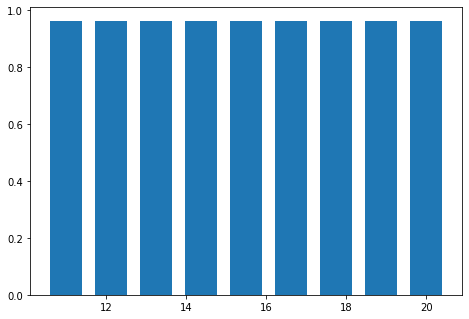

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xval = np.linspace(11,20,9)
ax.bar(xval,values3)
plt.show()

varying k values for item-based

In [ ]:
#item based
values = []
for i in range(5, 100, 5):
  algo = KNNBasic(k = i, sim_options={'user_based': False})
  acc = cross_validate(algo, data, measures={'RMSE'}, cv=5)
  values.append(statistics.mean(acc['test_rmse']))

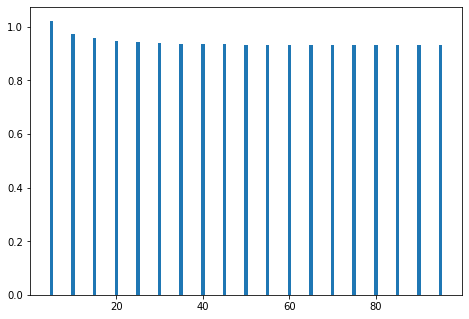

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xval = np.linspace(5,95,19)
ax.bar(xval,values)
plt.show()

In [ ]:
#item based
values4 = []
for i in range(36, 45):
  algo = KNNBasic(k = i, sim_options={'user_based': False})
  acc = cross_validate(algo, data, measures={'RMSE'}, cv=5)
  values4.append(statistics.mean(acc['test_rmse']))

In [16]:
print(np.linspace(36,45,9))
print(values4)

[36.    37.125 38.25  39.375 40.5   41.625 42.75  43.875 45.   ]
[0.9355816411492031, 0.9366059575839115, 0.9349467221059964, 0.9351415600414338, 0.9350489466669486, 0.9343327759932776, 0.93439144901969, 0.9339864856560051, 0.9337823403141504]


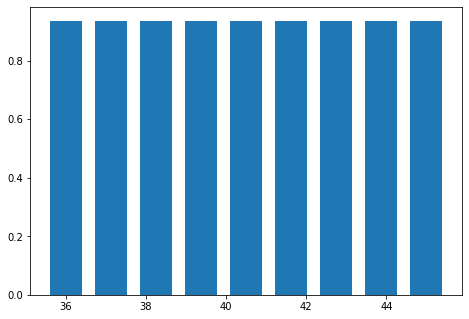

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xval = np.linspace(36,45,9)
ax.bar(xval,values4)
plt.show()